# Historical Statistics of the United States Data

In [ ]:
patents = pd.read_csv(r"Statistical Data/Historical Statistics of the United States/Patent applications filed and patents issued, by type of patent and patentee, 1790–2000/Cg27-37.csv").fillna(0)
funding = pd.read_csv(r"Statistical Data/Historical Statistics of the United States/Expenditures on research and development, by performing sector and source of funding, 1953–2000/Cg110-181.csv").fillna(0)

patents["Year"] = patents["Year"].astype(int)
funding["Year"] = funding["Year"].astype(int)

## Patents & Industry Research Funding

In [ ]:
filt = (patents["Year"] >= 1953)
patents_1953 = patents.loc[filt, ["Year", "PatentsIssued_Inventions_Total_Cg30_Number", "PatentsIssued_Inventions_Corporations_U.S._Cg32_Number", "PatentsIssued_Inventions_U.S.Government_Cg34_Number"]]

In [ ]:
# Chart with 1 axis
# plt.figure(figsize=(15,4))

# for series in patents_1953:
#     if series == "Year":
#         pass
#     else:
#         plt.bar(x=patents_1953["Year"], height=patents_1953[series], label=series)

# colors = ["#26E600", "#000000"]
# for i, series in enumerate(funding[["FederalGovernmentFunds_Cg113_MillionDollars", "ExpendituresByIndustry_IndustryFunds_Cg114_MillionDollars"]]):
#     plt.plot(patents_1953["Year"], funding[series], label=series, color=colors[i], marker="o")
    

# plt.xticks(ticks=patents_1953["Year"], rotation=90)

# plt.xlabel("Year")
# plt.ylabel("Patents Issued (bar) \n Research Expenditure in Millions (line)")
# plt.title("Patents Issued vs Research Expenditure")

# plt.legend()
# plt.show()

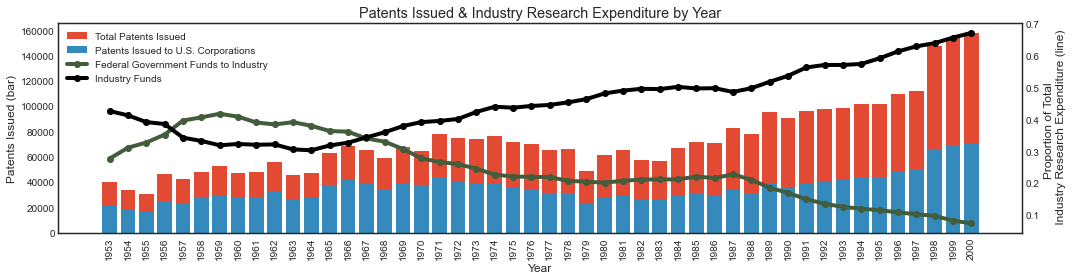

In [ ]:
plt.figure(figsize=(15,4))

ax1 = plt.gca()
ax2 = plt.gca().twinx()

labels = ["Year", "Total Patents Issued", "Patents Issued to U.S. Corporations", "Patents Issued to U.S. Government"]
for i, series in enumerate(patents_1953):
    if series == "Year" or series == "PatentsIssued_Inventions_U.S.Government_Cg34_Number":
        pass
    else:
        ax1.bar(patents_1953["Year"], patents_1953[series], label=labels[i])
        
colors = ["#425C3C", "#000000"]
labels = ["Federal Government Funds to Industry", "Industry Funds"]
for i, series in enumerate(funding[["FederalGovernmentFunds_Cg113_MillionDollars", "ExpendituresByIndustry_IndustryFunds_Cg114_MillionDollars"]]):
    ax2.plot(patents_1953["Year"], (funding[series] / funding["TotalU.S.Expenditures_Cg110_MillionDollars"]), label=labels[i], color=colors[i], marker="o")

ax1.set_xticks(patents_1953["Year"])
ax1.tick_params(axis="x", labelrotation=90)
ax1.set_xlabel("Year")
ax1.set_ylabel("Patents Issued (bar)")
ax2.set_ylabel("Proportion of Total \n Industry Research Expenditure (line)")

# Combine ledgends
art = ax1.get_legend_handles_labels()[0] + ax2.get_legend_handles_labels()[0]
labels = [l.get_label() for l in art]
ax1.legend(art, labels)

plt.style.use('seaborn-white') # Setting style for all subsequent plots
plt.title("Patents Issued & Industry Research Expenditure by Year")
plt.tight_layout()
plt.show()

## University Expenditure

In [ ]:
university_funds = funding[["Total_Cg116_MillionDollars", "FederalGovernmentFunds_Cg117_MillionDollars", "NonfederalGovernmentFunds_Cg118_MillionDollars", 
                            "IndustryFunds_Cg119_MillionDollars", "UniversityAndCollegeFunds_Cg120_MillionDollars", "NonprofitFunds_Cg121_MillionDollars"]]

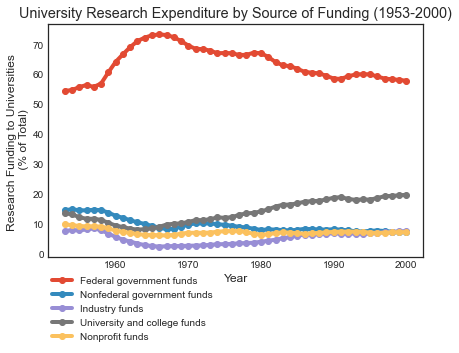

In [ ]:
labels = ["Total funds", "Federal government funds", "Nonfederal government funds", "Industry funds", "University and college funds", "Nonprofit funds"]

for i, series in enumerate(university_funds):
    if series == "Total_Cg116_MillionDollars":
        pass
    else:
        plt.plot(funding["Year"], (university_funds[series] / university_funds["Total_Cg116_MillionDollars"]) * 100, label=labels[i], marker="o")

plt.title("University Research Expenditure by Source of Funding (1953-2000)")
plt.xlabel("Year")
plt.ylabel("Research Funding to Universities \n (% of Total)")
plt.legend(loc=[0, -0.38])
plt.show()

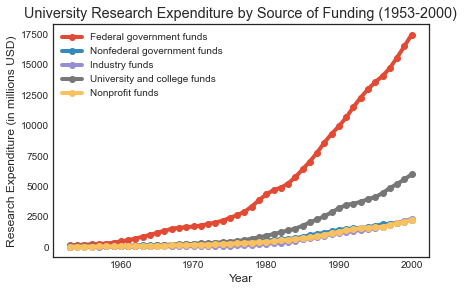

In [ ]:
labels = ["Total funds", "Federal government funds", "Nonfederal government funds", "Industry funds", "University and college funds", "Nonprofit funds"]

for i, series in enumerate(university_funds):
    if series == "Total_Cg116_MillionDollars":
        pass
    else:
        plt.plot(funding["Year"], university_funds[series], label=labels[i], marker="o")

plt.title("University Research Expenditure by Source of Funding (1953-2000)")
plt.xlabel("Year")
plt.ylabel("Research Expenditure (in millions USD)")
plt.legend()
plt.show()

## Basic, Applied and Developmental Research

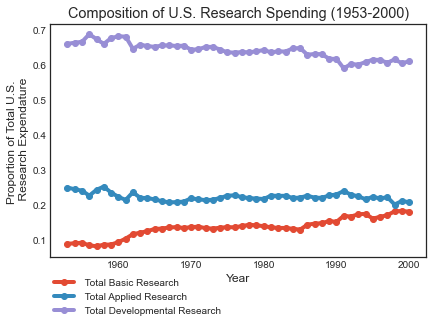

In [ ]:
def divide_total(series):
    percent = (series /  funding["TotalU.S.Expenditures_Cg110_MillionDollars"])
    return percent

plt.plot(funding["Year"], divide_total(funding["BasicResearch_TotalU.S.Expenditures_Cg128_MillionDollars"]), label=" Total Basic Research", marker="o")
plt.plot(funding["Year"], divide_total(funding["AppliedResearch_TotalU.S.Expenditures_Cg146_MillionDollars"]), label=" Total Applied Research", marker="o")
plt.plot(funding["Year"], divide_total(funding["Development_TotalU.S.Expenditures_Cg164_MillionDollars"]), label=" Total Developmental Research", marker="o")

plt.title("Composition of U.S. Research Spending (1953-2000)")
plt.xlabel("Year")
plt.ylabel("Proportion of Total U.S. \n Research Expendature")

plt.legend(loc=[0, -0.27])
plt.show()